In [1]:
using OrdinaryDiffEq, LinearAlgebra, ForwardDiff, PyPlot

In [2]:
grid_length=200
X1 = range(-30,stop=30,length=grid_length)
P1=range(-2,stop=2,length=grid_length)
grid=Iterators.product(X1,P1)
grid=collect.(grid)
println(length(grid))

println(grid[1][1])

40000
-30.0


In [4]:
function energia_poinc(x0, p0, m0, M0, a0, b0, H0)
    return (2. *M0*(H0-p0*p0/(2. *m0)+a*x0*x0/2. -b*x0*x0*x0*x0/4. ))^(1. /2. )
end

energia_poinc (generic function with 1 method)

In [5]:
m=[1.,0.1]
w=[0.,0.7071]
g=[0.,0.05]
a=0.25
b=0.01
time=10.
dts=0.01*2. *pi/w[2]
tspan = (0,time)
initial_position = [0., 0.]
#initial_velocity = [-4./m[1], (-1. )^1. *energia_poinc(0.,-3.4957/m[1],m[1],m[2],a,b,Hinicial)/m[2]]
initial_momentum=[0. ,0.]
colors=zeros(length(grid))
Hsys(q,p) = p[1]^2. /(2. *m[1]) - a*q[1]^2. /2. +b*q[1]^4. /4. +q[1]*g[2]*q[2]+ p[2]^2. /(2. *m[2]) +0.5*m[2]*w[2]^2. *q[2]^2.  
pdot(dp,p,q,params,t) = ForwardDiff.gradient!(dp, q->-Hsys(q, p), q)
qdot(dq,p,q,params,t) = ForwardDiff.gradient!(dq, p-> Hsys(q, p), p)
k=0.


for I in range(1,stop=length(grid),length=length(grid))
    if I%100==0
        println(I/length(grid))
    end
    #Hinicial=20.0
    initial_position[2]=grid[Int(I)][1]
    initial_momentum[2]=grid[Int(I)][2]
            
    
    prob = DynamicalODEProblem(pdot, qdot, initial_momentum, initial_position, tspan)
    sol3 = solve(prob, CalvoSanz4(), dt=dts);
    k=sol3
    for i in range(1,stop=length(sol3[3,:])-1,length=length(sol3[3,:])-1)
        if sol3[3,Int(i)] < 6. && sol3[3,Int(i+1)] >= 6.
            colors[Int(I)]=1.
            break
        elseif sol3[3,Int(i)] > -6. && sol3[3,Int(i+1)] <= -6.
            colors[Int(I)]=0.
            break
        end
    end
end

0.0025
0.005
0.0075
0.01
0.0125
0.015
0.0175
0.02
0.0225
0.025
0.0275
0.03
0.0325
0.035
0.0375
0.04
0.0425
0.045
0.0475
0.05
0.0525
0.055
0.0575
0.06
0.0625
0.065
0.0675
0.07
0.0725
0.075
0.0775
0.08
0.0825
0.085
0.0875
0.09
0.0925
0.095
0.0975
0.1
0.1025
0.105
0.1075
0.11
0.1125
0.115
0.1175
0.12
0.1225
0.125
0.1275
0.13
0.1325
0.135
0.1375
0.14
0.1425
0.145
0.1475
0.15
0.1525
0.155
0.1575
0.16
0.1625
0.165
0.1675
0.17
0.1725
0.175
0.1775
0.18
0.1825
0.185
0.1875
0.19
0.1925
0.195
0.1975
0.2
0.2025
0.205
0.2075
0.21
0.2125
0.215
0.2175
0.22
0.2225
0.225
0.2275
0.23
0.2325
0.235
0.2375
0.24
0.2425
0.245
0.2475
0.25
0.2525
0.255
0.2575
0.26
0.2625
0.265
0.2675
0.27
0.2725
0.275
0.2775
0.28
0.2825
0.285
0.2875
0.29
0.2925
0.295
0.2975
0.3
0.3025
0.305
0.3075
0.31
0.3125
0.315
0.3175
0.32
0.3225
0.325
0.3275
0.33
0.3325
0.335
0.3375
0.34
0.3425
0.345
0.3475
0.35
0.3525
0.355
0.3575
0.36
0.3625
0.365
0.3675
0.37
0.3725
0.375
0.3775
0.38
0.3825
0.385
0.3875
0.39
0.3925
0.395
0.3975
0.4
0.40

In [64]:
length(k[3,:])

114

In [6]:
colors=reshape(colors,(grid_length,grid_length))
colors=colors'

200×200 Adjoint{Float64,Array{Float64,2}}:
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  

In [154]:
println(k6[3,1:12])
println(colors[6])
#k58=0.
#k59=0.
#k60=0.
#k61=0.
#k62=0.
#k63=0.

[0.0, 0.0010840520255744127, 0.0044239408258600664, 0.010146323388650244, 0.01837371301115847, 0.029224306698260368, 0.04281183821297549, 0.05924545745846121, 0.07862963658034038, 0.10106410284557361, 0.12664379797911043, 0.15545886322259417]
1.0


In [155]:
grid[100]

2-element Array{Float64,1}:
 30.0
 -2.0

In [156]:
grid[1][2]

-2.0

In [7]:

XX1=zeros(length(grid[:]))
PP1=zeros(length(grid[:]))
for i in range(1, stop=length(grid[:]),length=length(grid[:]))
    XX1[Int(i)]=grid[Int(i)][1]
    PP1[Int(i)]=grid[Int(i)][2]
end
XX1=reshape(XX1,(grid_length,grid_length))
PP1=reshape(PP1,(grid_length,grid_length))
#colors=reshape(colors,(10,10))
XX1=rotl90(XX1)
PP1=rotl90(PP1)
#colors=colors'


200×200 Array{Float64,2}:
  2.0       2.0       2.0       2.0      …   2.0       2.0       2.0    
  1.9799    1.9799    1.9799    1.9799       1.9799    1.9799    1.9799 
  1.9598    1.9598    1.9598    1.9598       1.9598    1.9598    1.9598 
  1.9397    1.9397    1.9397    1.9397       1.9397    1.9397    1.9397 
  1.9196    1.9196    1.9196    1.9196       1.9196    1.9196    1.9196 
  1.8995    1.8995    1.8995    1.8995   …   1.8995    1.8995    1.8995 
  1.8794    1.8794    1.8794    1.8794       1.8794    1.8794    1.8794 
  1.8593    1.8593    1.8593    1.8593       1.8593    1.8593    1.8593 
  1.8392    1.8392    1.8392    1.8392       1.8392    1.8392    1.8392 
  1.8191    1.8191    1.8191    1.8191       1.8191    1.8191    1.8191 
  1.79899   1.79899   1.79899   1.79899  …   1.79899   1.79899   1.79899
  1.77889   1.77889   1.77889   1.77889      1.77889   1.77889   1.77889
  1.75879   1.75879   1.75879   1.75879      1.75879   1.75879   1.75879
  ⋮                      

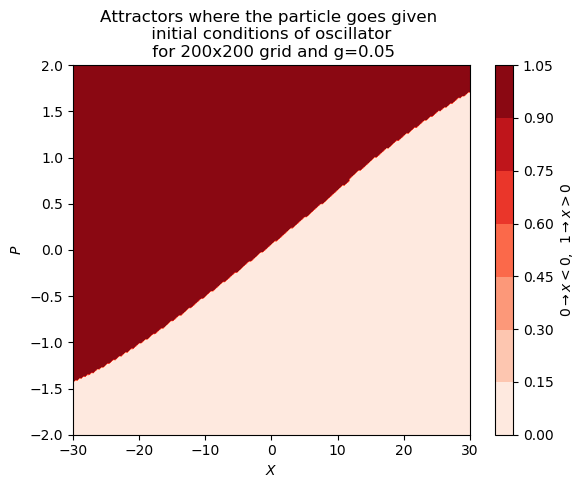

In [10]:
contourf(XX1,PP1,colors,cmap="Reds")
colorbar(label=L"$0\rightarrow x<0$,  $1\rightarrow x>0$")
xlabel(L"$X$")
ylabel(L"$P$")
title("Attractors where the particle goes given \n initial conditions of oscillator \n for 200x200 grid and g=0.05")
savefig("g0-05particle_sides.png",bbox_inches="tight")
savefig("g0-05particle_sides.pdf",bbox_inches="tight")
#matshow(colors)
#xticks(range(-30,stop=(30),length=(10)))
#yticks(range(-2,stop=(2),length=(10)))
#colorbar()

In [9]:
PyPlot.pygui(false)

false

In [162]:
r=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
r=reshape(r,(4,4))

4×4 Array{Int64,2}:
 1  5   9  13
 2  6  10  14
 3  7  11  15
 4  8  12  16

In [109]:
rotl90(r)

4×4 Array{Int64,2}:
 13  14  15  16
  9  10  11  12
  5   6   7   8
  1   2   3   4